Introduction
The purpose of this data is for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

More about the data
Number of attributes : 17

Number of rows : 2111

Independent Variables

Gender - (Male/Female)
Age - In years
Height - In meters
Weight - In Kgs
family_history_with_overweight - Family history in obesity - Yes or No
FAVC - Frequent consumption of high caloric food - Yes/No
FCVC - Frequency of consumption of vegetables - 1 = never, 2 = sometimes, 3 = always

NCP - Number of main meals - 1, 2, 3 or 4 meals

CAEC - Consumption of food between meals - No, Sometimes, Frequently, Always
Smoke - Does the person smoke - Yes/No
CH20 - Consumption of water daily - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters
SCC - Calories consumption monitoring - Yes/No
FAF - Physical activity frequency - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days
TUE - Time using technology devices - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours
CALC - Consumption of alcohol - No, Sometimes, Frequently and Always
MTRANS - Transportation used - Public Transportation, Motorbike, Bike, Automobile and Walking
Dependent Variables

NObeyesdad - Obesity level - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III
What are the data types?
Gender - Categorical
Age - Numeric
Height - Numeric
Weight - Numeric
family_history_with_overweight - Categorical
FAVC - Categorical
FCVC - Categorical
NCP - Categorical
CAEC - Categorical
SMOKE - Categorical
CH2O - Categorical
SCC - Categorical
FAF - Categorical
TUE - Categorical
CALC - Categorical
MTRANS - Categorical
NObeyesdad - Categorical



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [15]:
# Reading the file and storing columns seperately
obesity_data= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [16]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
obesity_data.shape

(2111, 17)

 Exploratory Data Analysis

In [18]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Explore Features


As mentioned earlier, part of the data were collected thought an online survey. Respondents had several options to answer each question. Features hold information gathered for each particular question and the corresponding possible answers. These are described and explored below.

Counting and visualizing categorical variables is wrapped in a function for avoiding repeated operations. The first plot shows the number of men and women in the dataset.


In [19]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()


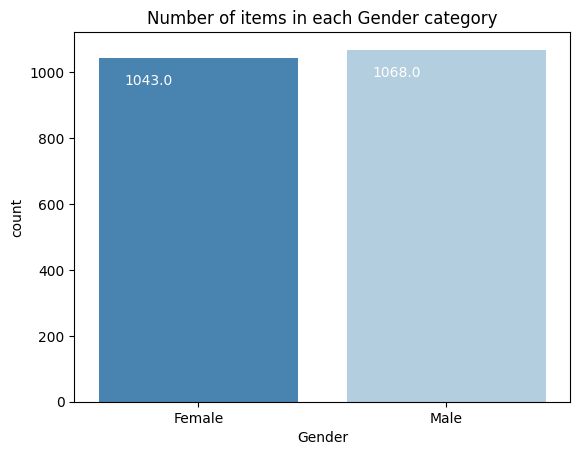

In [20]:
count_values(obesity_data, "Gender")


In [21]:
obesity_data["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [22]:
obesity_data["Age"].median()

22.77789

In [23]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

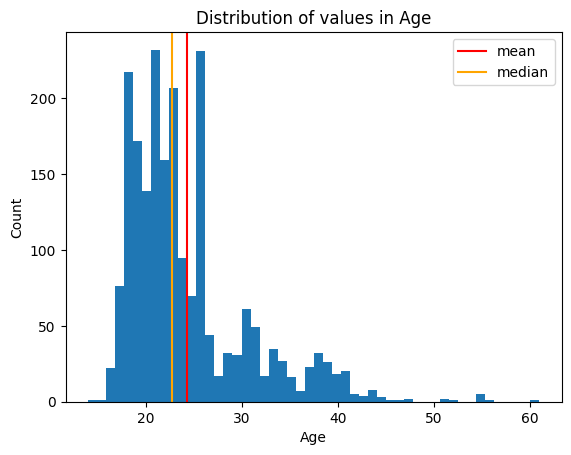

In [24]:
plot_distribution(obesity_data, "Age") 

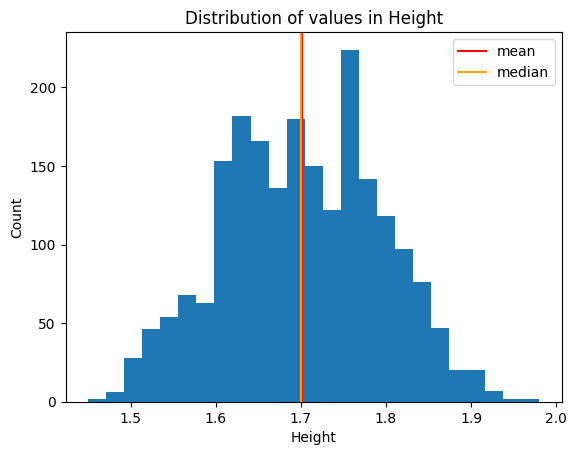

In [25]:
plot_distribution(obesity_data, "Height")

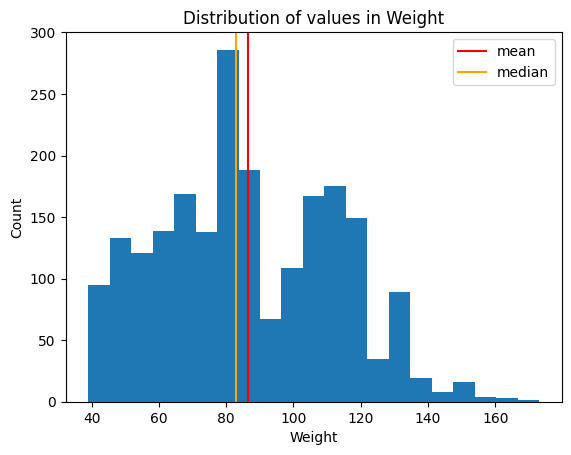

In [26]:
plot_distribution(obesity_data, "Weight")


It would be interesting to see if there is any relationship between "Height" and "Weight" since both metrics are used to compute Body mass index. Furthermore, these are the most important features (see Chapter V) for predicting if a person suffers from overweight/obesity.

The code line below plots each person's weight and height. The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. In other words, taller people are more likely to weight more.

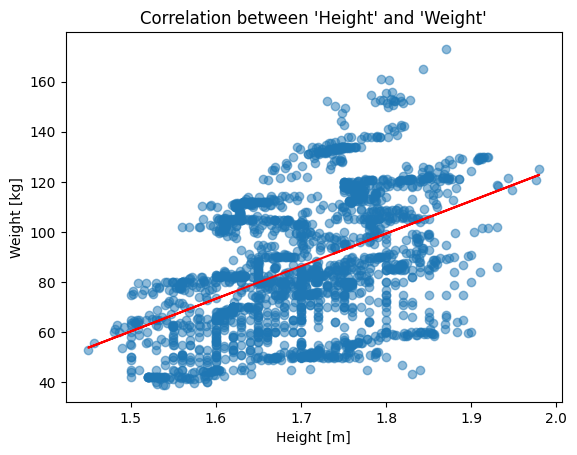

In [27]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()


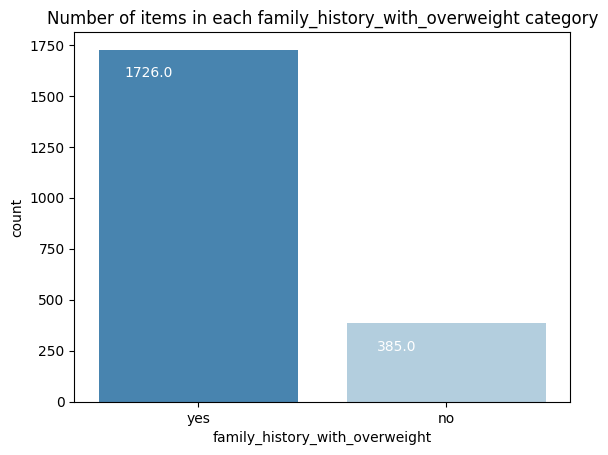

In [28]:
count_values(obesity_data, "family_history_with_overweight")

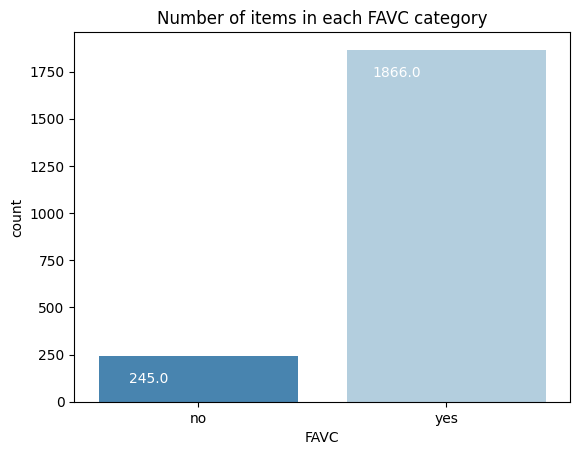

In [29]:
count_values(obesity_data, "FAVC")

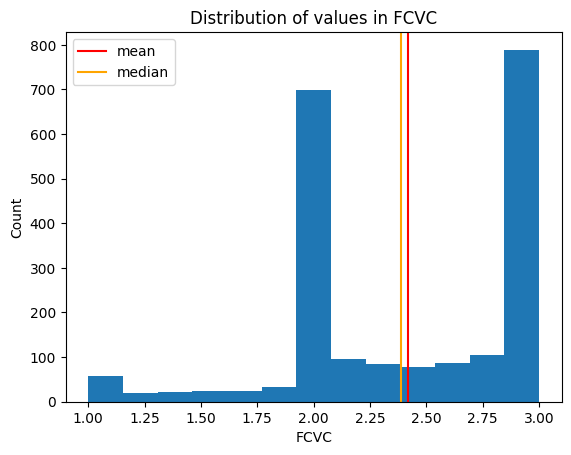

In [30]:
plot_distribution(obesity_data, "FCVC")

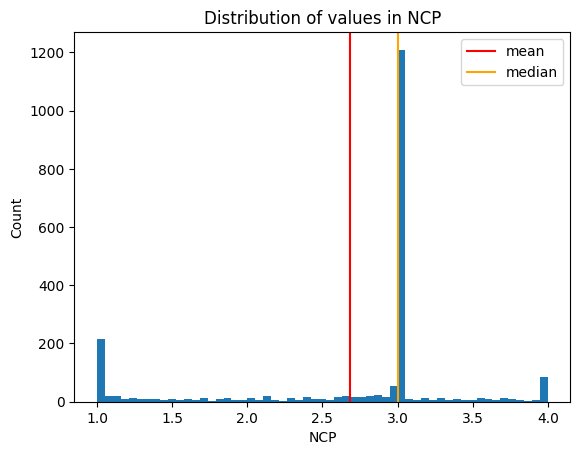

In [31]:
plot_distribution(obesity_data, "NCP")


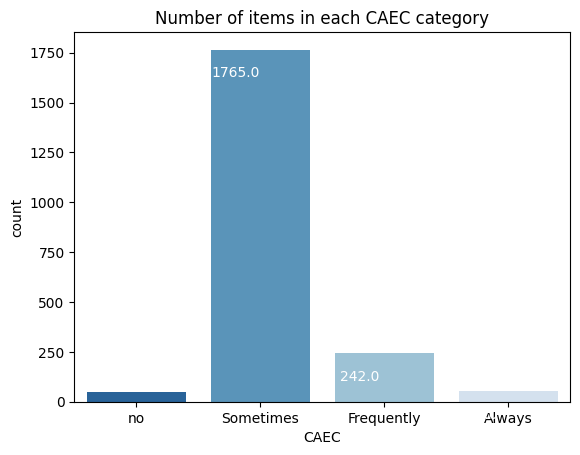

In [32]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])


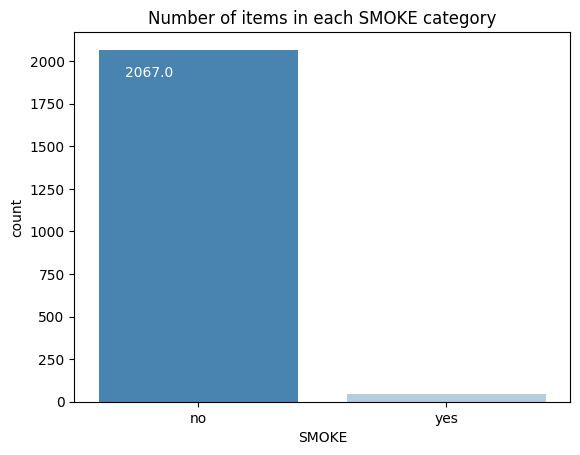

In [33]:
count_values(obesity_data, "SMOKE")

Drink water
Drinking water habits should have been categorised in three groups: "Less than a litter", "Between 1 and 2 L", and "More than 2 L". Instead, the answeres are entered as continuous values. Their distribution (not very informative, too) is shown below.



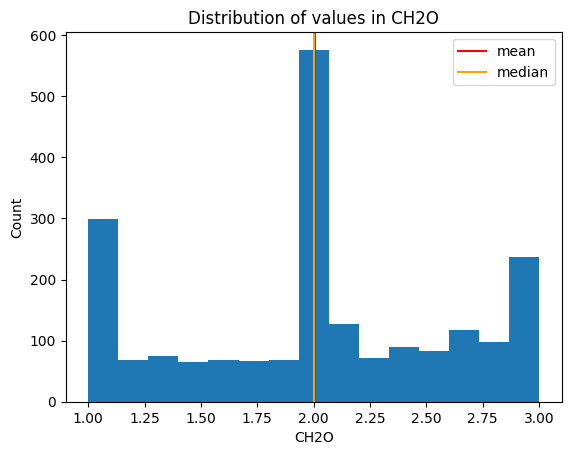

In [34]:
plot_distribution(obesity_data, "CH2O")


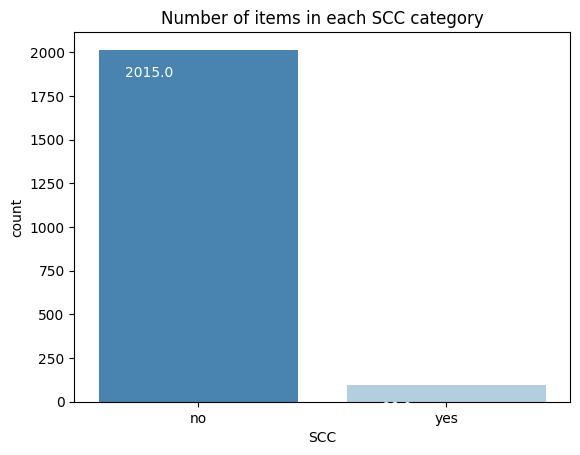

In [35]:
count_values(obesity_data, "SCC")


Normal, Overweight or Obese?
People, according to their Body mass index (BMI), are categorised as:

Underweight if BMI < 18.5
Normal if BMI 18.5 - 24.9
Overweight if BMI 25.0 - 29.9
Obesity I if BMI 30.0 - 34.9
Obesity II if BMI 35.0 to 39.9
Obesity III if BMI > 40
Number of people per category is displayed below (note: categories are ordered logically).

The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.

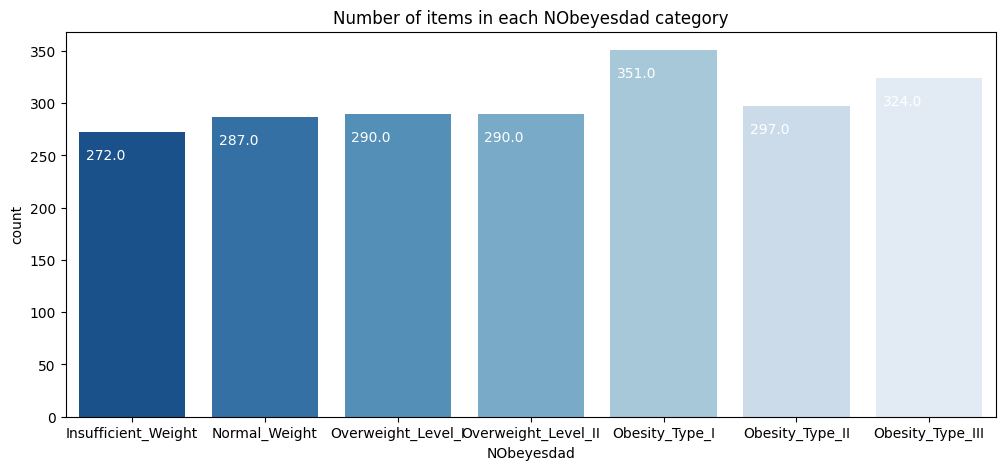

In [36]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 


In [37]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()


Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.

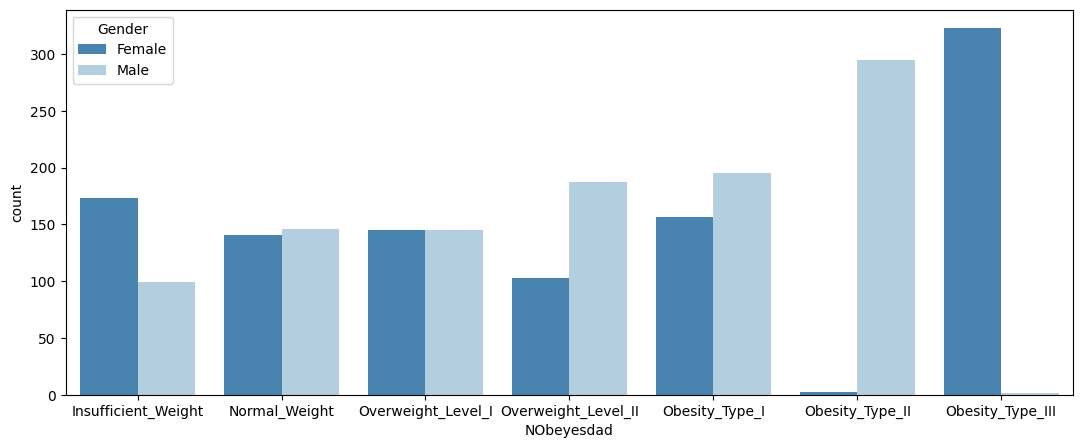

In [38]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


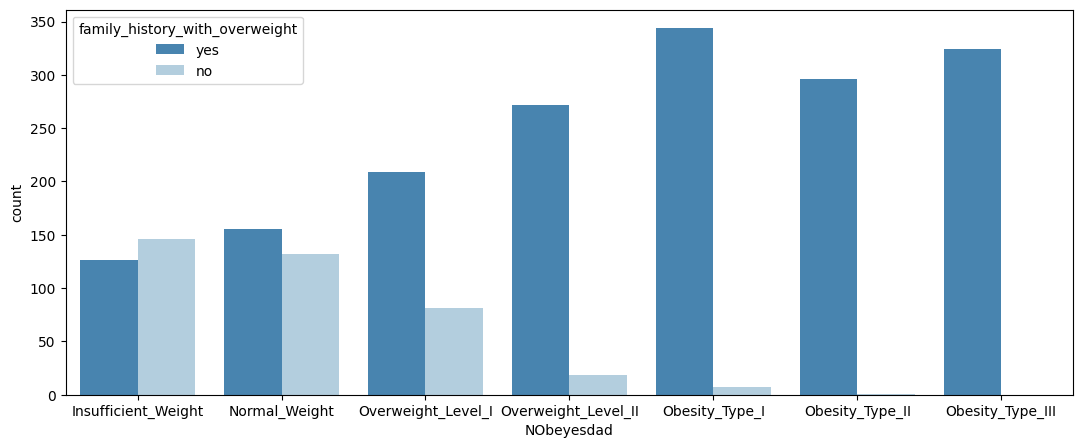

In [39]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])


Both normal weight and overweight/obese people consume high calories food. Perhaps food quantity makes the difference and affects body fats.

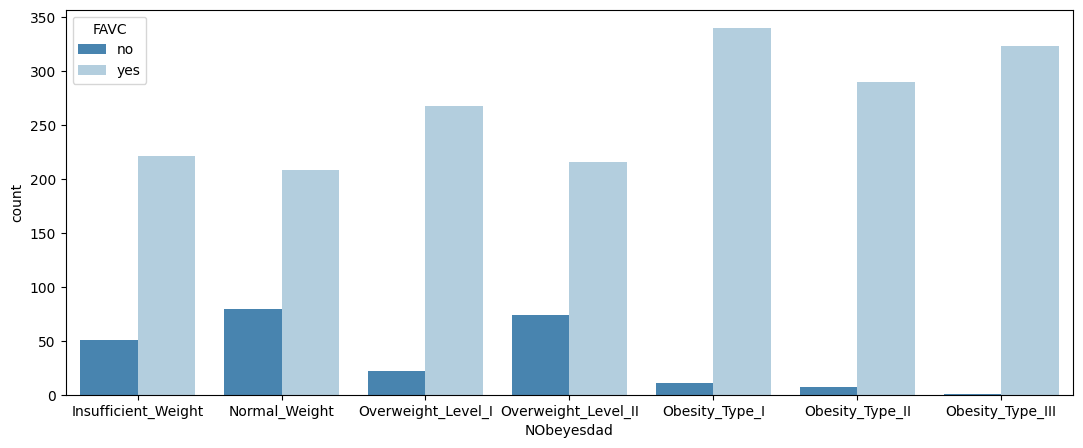

In [40]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Weight of those who "frequently" or "always" get food between meals does not seem to be abnormal. Only people having snaks from time to time go into "Overweight" or "Obesity" categories.

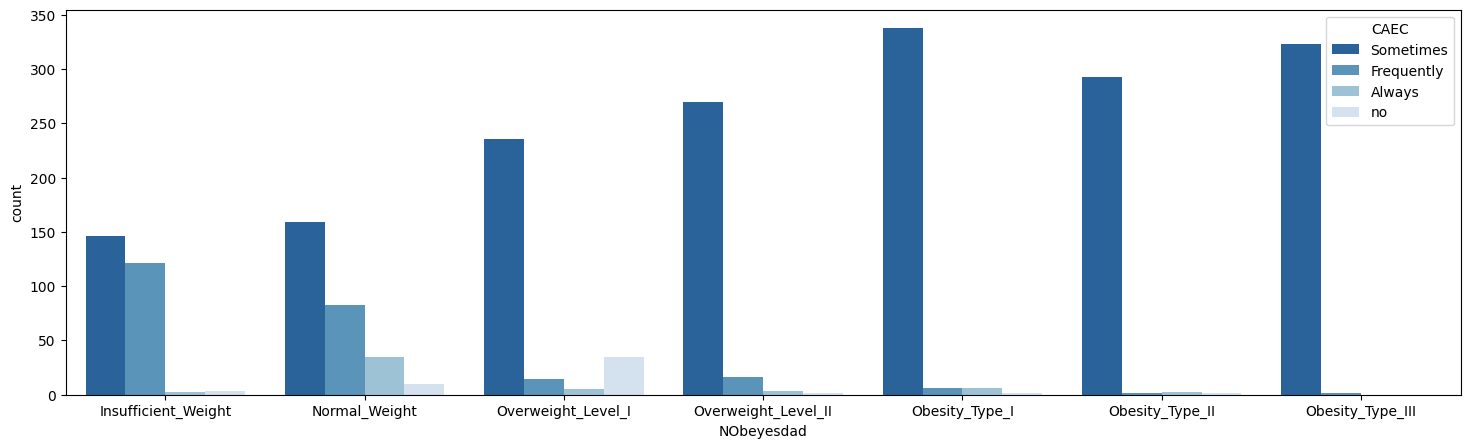

In [41]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Explore Statistics

Five-number statistics does not reveal much information about features with numeric values. Data in most columns (except age, height and weight) are not interpretable. Nonetheless, these are displayed below.



In [42]:
obesity_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [43]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]


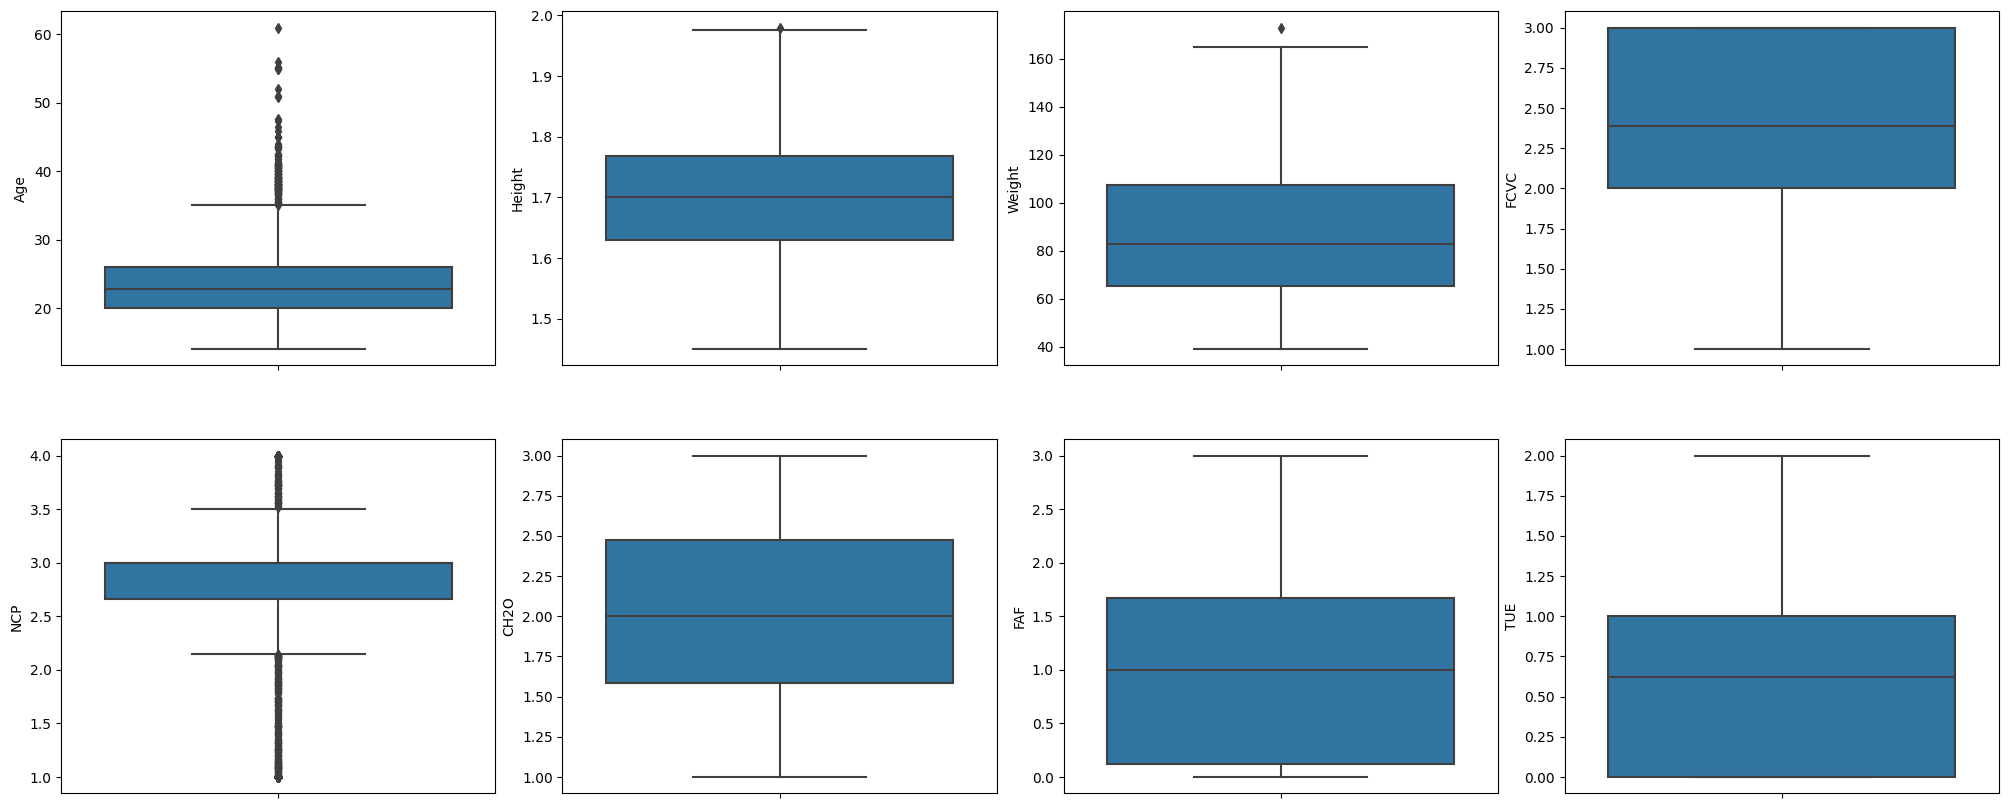

In [44]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)


In [46]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])


In [47]:
obesity_lab = obesity_data[["NObeyesdad"]]


In [48]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [49]:
obesity_concatenated.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,False,True,False,False,False,False,True,False,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,True,False,False,False,False,False,False,True,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,True,False,False,False,False,True,False,Overweight_Level_II


Separate Features and Labels

In [50]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)


In [51]:
obesity_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

Convert Numerical Values

In [52]:
obesity_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

In [53]:
obesity_features = obesity_features.astype("float")

In [54]:
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

Scale Features

In [55]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)


In [56]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

 Encode Labels

Most Machine Learning classification algorithms expect labels with numeric values (and not strings). For this reason, obesity class is encoded with LabelEncoder(). The latter replaces each class with an integer.

First, the encoder is instantiated. Then, it "overviews" the data. transform() encodes the classes and assigns them the respective number.



In [57]:
encoder = LabelEncoder()


In [58]:
encoder.fit(obesity_label)


LabelEncoder()

In [59]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [60]:
obesity_labels_encoded = encoder.transform(obesity_label)


In [61]:
obesity_labels_encoded


array([1, 1, 1, ..., 4, 4, 4])

Train - Test split

In [62]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded, 
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42) # shuffle=True


In [63]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))

In [64]:
Counter(obesity_labels_tr)


Counter({5: 232, 1: 229, 6: 232, 0: 218, 3: 237, 4: 259, 2: 281})

In [65]:
Counter(obesity_labels_ts)


Counter({0: 54, 1: 58, 6: 58, 4: 65, 3: 60, 2: 70, 5: 58})

Build Model

In [66]:
f1 = make_scorer(f1_score, average = "weighted")


In [67]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}


In [68]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)


In [69]:
grid_search.fit(obesity_features_tr, obesity_labels_tr)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

In [70]:
grid_search.cv_results_


{'mean_fit_time': array([0.01180439, 0.0120759 , 0.01220031, 0.01311736, 0.01240292,
        0.01370144]),
 'std_fit_time': array([0.00388114, 0.00202391, 0.00074758, 0.00180444, 0.00049045,
        0.00208671]),
 'mean_score_time': array([0.00520148, 0.00580168, 0.00490236, 0.00450716, 0.00490265,
        0.00565114]),
 'std_score_time': array([0.00116693, 0.00098065, 0.00156464, 0.00126096, 0.00080184,
        0.00194594]),
 'param_max_depth': masked_array(data=[5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15}],
 'split0_test_score': array([0.77706974, 0.86890407, 0.90459401, 0.91380292, 0.91061444,
        0.8957187 ]),
 'split1_test_score': array([0.82389405, 0.92098484, 0.94369011, 0.94052247, 0.93495268,
        0.94105325]),
 'split2_test_score': array([0.8430409

In [71]:
grid_search.best_params_


{'max_depth': 13}

In [72]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)


In [73]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")


Both "accuracy" and "f1 score" on the training data are 100% but on the testing one is 91%-92%. The latter suggests the model is overfitting. Its performance could be improved either with regularization (e.g., shallower tree, setting minimum samples per leaf), or with feature selection (e.g., removing non-important columns), or with increasing the number of samples in both sets. Neither of these techniques is explored further since "accuracy" and "f1 score" over 90% is not so disappointing.



In [74]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)


Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9148936170212766
F1 on Test data: 0.9152724912457364


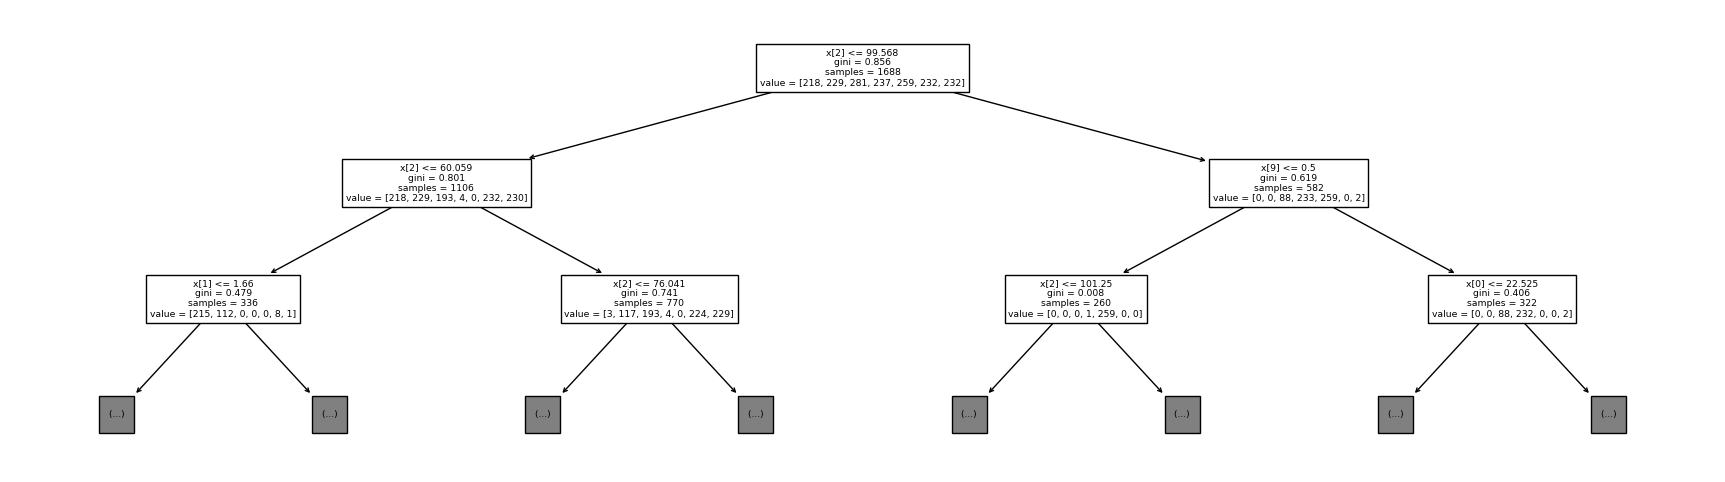

In [75]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()


classification_report is a scikit learn function which shows classification success (metrics) for each class. For example, most of the samples in "Obesity_Type_III" (class 4) were properly classified. The model reached 100% "precision" and 99% "f1 score". On the other hand, features indicating "Normal_Weight" (class 1) were wrongly interpreted and got around 80% on "precision" and "f1 score".

In [76]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))


              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.80      0.84      0.82        58
           2       0.91      0.96      0.93        70
           3       0.97      0.95      0.96        60
           4       1.00      0.98      0.99        65
           5       0.86      0.86      0.86        58
           6       0.91      0.91      0.91        58

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.92      0.91      0.92       423



In [77]:
model_tree.classes_


array([0, 1, 2, 3, 4, 5, 6])

In [78]:
list(encoder.classes_)


['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

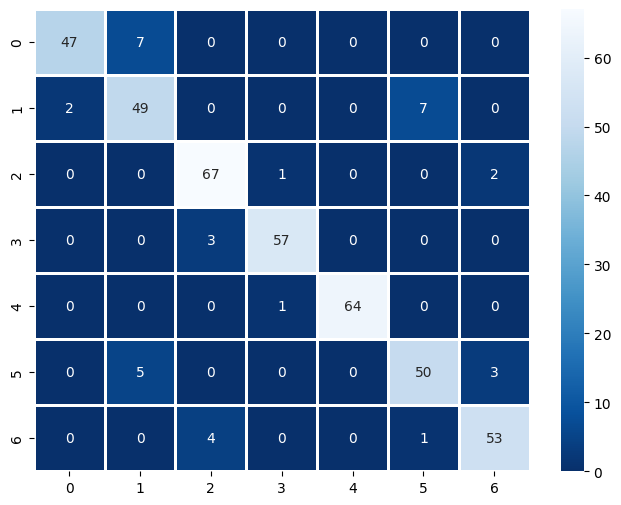

In [79]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

ROC Score and Curve
Another popular classification metric is the ROC curve (Receiver Operating Characteristic curve). It is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate. Area Under the Curve (AUC) represents the probability that a random positive example is positioned to the right of a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.

AUC and ROC curve require computing probability prediction scores. These show the probability a certain sample belongs to a particular class.



In [80]:
obesity_score_probability = model_tree.predict_proba(obesity_features_ts)
obesity_score_probability

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [81]:
roc_auc_score(obesity_labels_ts, obesity_score_probability, multi_class = "ovr")


0.948826099443833

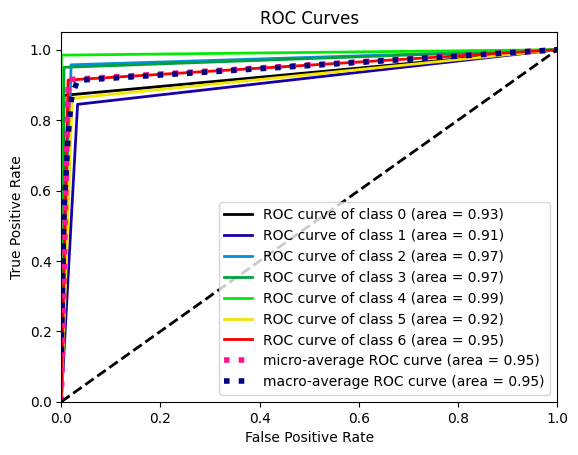

In [88]:
skplt.metrics.plot_roc(obesity_labels_ts, obesity_score_probability)
plt.show()


ROC Curves are ploted above. They climb up and to the left, which indicates a good model performance. As found earlier, the model best predicts class 4 (light green line), class 6 (red line) and class 0 (black line). AUCs for all classes are displayed on the legend.